# Predict Laptop Price - IE224 Nhóm 10

## Import Thư viện

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
# from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split

In [3]:
!pip install hvplot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.2/161.2 kB 2.3 MB/s eta 0:00:00


In [4]:
import panel as pn
pn.extension('tabulator')
import hvplot.pandas

<ipython-input-4-5e2d5f32f49e>:2: UserWarning: Using Panel interactively in Colab notebooks requires the jupyter_bokeh package to be installed. Install it with:

    !pip install jupyter_bokeh

and try again.
  pn.extension('tabulator')


## Thông tin cơ bản về  bộ dữ liệu

In [5]:
path = "/content/drive/MyDrive/IE224/laptop_data.csv"

In [6]:
df = pd.read_csv(path)

In [7]:
df.head()

,brand,model,condition,warranty,screen_size,processor,ram,card,hard_driver,made_in,information,hard_driver_kind,price
0,Dell,Latitude,Đã sử dụng (chưa sửa chữa),3 tháng,15 - 16.9 inch,Intel Core i7,16 GB,NVIDIA,256 GB,Mỹ,In trên bao bì,SSD,7.600.000 đ
1,Asus,Dòng Khác,Đã sử dụng (chưa sửa chữa),Bảo hành hãng,15 - 16.9 inch,Intel Core i5,8 GB,NVIDIA,256 GB,Đang cập nhật,In trên bao bì,SSD,5.400.000 đ
2,Dell,Latitude,Đã sử dụng (chưa sửa chữa),3 tháng,11 - 12.9 inch,Intel Core i5,8 GB,Khác,256 GB,Mỹ,In trên bao bì,SSD,3.950.000 đ
3,Apple,MacBook Pro,Mới,Bảo hành hãng,15 - 16.9 inch,Intel Core i9,16 GB,NVIDIA,512 GB,Mỹ,In trên bao bì,SSD,14.500.000 đ
4,Lenovo,ThinkPad,Đã sử dụng (chưa sửa chữa),3 tháng,13 - 14.9 inch,Intel Core i5,8 GB,NVIDIA,256 GB,Việt Nam,In trên bao bì,SSD,5.990.000 đ


In [8]:
df.shape

(591, 13)

- Bộ dữ liệu bao gồm 130 dòng và 15 cột dữ liệu

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591 entries, 0 to 590
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   brand             591 non-null    object
 1   model             591 non-null    object
 2   condition         591 non-null    object
 3   warranty          591 non-null    object
 4   screen_size       486 non-null    object
 5   processor         493 non-null    object
 6   ram               505 non-null    object
 7   card              448 non-null    object
 8   hard_driver       506 non-null    object
 9   made_in           591 non-null    object
 10  information       591 non-null    object
 11  hard_driver_kind  488 non-null    object
 12  price             591 non-null    object
dtypes: object(13)
memory usage: 60.1+ KB


In [10]:
for col in df.columns:
    missing_data = df[col].isna().sum()
    print("Cột {} có: {} dữ liệu khuyết".format(col, missing_data))

Cột brand có: 0 dữ liệu khuyết
Cột model có: 0 dữ liệu khuyết
Cột condition có: 0 dữ liệu khuyết
Cột warranty có: 0 dữ liệu khuyết
Cột screen_size có: 105 dữ liệu khuyết
Cột processor có: 98 dữ liệu khuyết
Cột ram có: 86 dữ liệu khuyết
Cột card có: 143 dữ liệu khuyết
Cột hard_driver có: 85 dữ liệu khuyết
Cột made_in có: 0 dữ liệu khuyết
Cột information có: 0 dữ liệu khuyết
Cột hard_driver_kind có: 103 dữ liệu khuyết
Cột price có: 0 dữ liệu khuyết


- Số lượng các giá trị khuyết ở trên là các giá trị np.nan

In [11]:
# Kiểm tra các dòng trùng nhau
df.duplicated().sum()

166

In [12]:
# Thực hiện loại bỏ các dòng trùng nhau
df = df.drop_duplicates()

# 1. Định dạng và làm sạch bộ dữ liệu (Data Cleaning)

## Định dạng dữ liệu

### Thay các giá trị "Khác" trong cột "processor" và "card" thành np.nan

In [13]:
# Dùng phương thức replace để thay giá trị "Khác" => np.nan
df["processor"].replace(to_replace="Khác", value=np.nan, inplace=True)
df["card"].replace(to_replace="Khác", value=np.nan, inplace=True)

<ipython-input-13-ec86226de73e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["processor"].replace(to_replace="Khác", value=np.nan, inplace=True)
<ipython-input-13-ec86226de73e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["processor"].replace(to_replace="Khác", value=np.nan, inplace=True)
<ipython-input-13-ec86226de73e>:3: Future

### Chuẩn hóa dữ liệu cột hard_driver
- Thay các giá trị < 128GB và > 1TB trong cột "hard_driver" => 128 và 1TB.
- Loại bỏ từ "GB"

In [14]:
df['hard_driver'] = df['hard_driver'].replace({'< 128 GB': '128 GB','> 1 TB': '1024 GB', '1 TB':'1024 GB'})

<ipython-input-14-16ac12764080>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hard_driver'] = df['hard_driver'].replace({'< 128 GB': '128 GB','> 1 TB': '1024 GB', '1 TB':'1024 GB'})


In [15]:
df['hard_driver'] = df['hard_driver'].str.replace(' GB', '')

In [16]:
df['hard_driver']

,hard_driver
0,256
1,256
2,256
3,512
4,256
...,...
585,256
586,512
587,512
589,256


### Chuẩn hóa dữ liệu cột ram
- Chuyển > 32 GB thành 32 GB
- Loại bỏ từ "GB"

In [17]:
df['ram'] = df['ram'].replace({'> 32GB': '32 GB',})

In [18]:
df['ram'] = df['ram'].str.replace(' GB', '')

In [19]:
df['ram']

,ram
0,16
1,8
2,8
3,16
4,8
...,...
585,8
586,8
587,16
589,8


### Xóa kí hiệu "đ" ở cuối giá tiền cũng như bỏ đi những dấu chấm trong mệnh giá tiền (Thí dụ từ 1.000.200 đ sẽ thành 1000200)

In [20]:
df['price'] = df['price'].astype(str)
df['price'] = df['price'].str.replace(" đ", "", regex=False)  # Xóa " đ"
df['price'] = df['price'].str.replace(".", "", regex=False)   # Xóa dấu chấm
df['price'] = df['price'].astype(int)  # Chuyển sang số nguyên

### Chuẩn hóa dữ liệu cột screen_size
- Loại bỏ từ " inch"
- Chuyển các giá trị:
  - => 21 -> 21
  - 11 - 12.9 "12.9
  - 13 - 14.9", "14.9
  - 15 - 16.9", "16.9
  - 17 - 18.9", "18.9
  - 19 - 20.9 -> 20.9

In [21]:
# Thực hiện thay thế số cụ thể cho các giá trị trong khoảng
df['screen_size'] = df['screen_size'].str.replace(' inch', '')
df["screen_size"].replace(">= 21", "21", inplace=True)
df["screen_size"].replace("11 - 12.9", "12.9", inplace=True)
df["screen_size"].replace("13 - 14.9", "14.9", inplace=True)
df["screen_size"].replace("15 - 16.9", "16.9", inplace=True)
df["screen_size"].replace("17 - 18.9", "18.9", inplace=True)
df["screen_size"].replace("19 - 20.9", "20.9", inplace=True)

<ipython-input-21-8ca979195edd>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["screen_size"].replace(">= 21", "21", inplace=True)
<ipython-input-21-8ca979195edd>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [22]:
df["screen_size"]

,screen_size
0,16.9
1,16.9
2,12.9
3,16.9
4,14.9
...,...
585,14.9
586,14.9
587,16.9
589,16.9


### Chuẩn hóa dữ liệu cột made_in:
- Việt Nam => VietNam
- Mỹ       => US
- Nhật Bản => Japan
- Đài loan => Taiwan

In [23]:
df["made_in"].value_counts()

,count
made_in,
Mỹ,142
Đang cập nhật,129
Việt Nam,78
Nhật Bản,36
Nước khác,18
Trung Quốc,15
Đài Loan,4
Thái Lan,2
Hàn Quốc,1


In [24]:
# thực hiện chuẩn hóa giá trị của cột made_in
df["made_in"].replace("Mỹ", "US", inplace=True)
df['made_in'] = df['made_in'].replace({'Đang cập nhật': np.nan})
df["made_in"].replace("Việt Nam", "VietNam", inplace=True)
df["made_in"].replace("Nhật Bản", "Japan", inplace=True)
df["made_in"] = df['made_in'].replace({'Nước khác': np.nan})
df["made_in"].replace("Đài Loan", "Taiwan", inplace=True)
df["made_in"].replace("Thái Lan", "ThaiLand", inplace=True)
df["made_in"].replace("Hàn Quốc", "Korea", inplace=True)

<ipython-input-24-348eca247397>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["made_in"].replace("Mỹ", "US", inplace=True)
<ipython-input-24-348eca247397>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [25]:
df["made_in"].value_counts()

,count
made_in,
US,142
VietNam,78
Japan,36
Trung Quốc,15
Taiwan,4
ThaiLand,2
Korea,1


### Chuẩn hóa dữ liệu cột warranty
- Loại bỏ từ " tháng"
- Hết bảo hành => 0
- Bảo hành hãng, Còn bảo hành => np.nan để thực hiện thay bằng giá trị xuất hiện nhiều nhất

In [26]:
df.warranty.value_counts()

,count
warranty,
Bảo hành hãng,119
3 tháng,103
Hết bảo hành,69
1 tháng,50
Còn bảo hành,37
4-6 tháng,24
7-12 tháng,14
>12 tháng,9


###Chuẩn hóa dữ liệu cột "information"
- Xóa cột information

In [27]:
df = df.drop(columns=['information'])

In [28]:
# Thực hiện chuẩn hóa dữ liệu cột warranty
df['warranty'] = df['warranty'].str.replace(' tháng', '')
df.replace("Còn bảo hành", np.nan, inplace=True)
df.replace("Bảo hành hãng", np.nan, inplace=True)
df.replace("Hết bảo hành", "0", inplace=True)

In [29]:
df

,brand,model,condition,warranty,screen_size,processor,ram,card,hard_driver,made_in,hard_driver_kind,price
0,Dell,Latitude,Đã sử dụng (chưa sửa chữa),3,16.9,Intel Core i7,16,NVIDIA,256,US,SSD,7600000
1,Asus,Dòng Khác,Đã sử dụng (chưa sửa chữa),NaN,16.9,Intel Core i5,8,NVIDIA,256,NaN,SSD,5400000
2,Dell,Latitude,Đã sử dụng (chưa sửa chữa),3,12.9,Intel Core i5,8,NaN,256,US,SSD,3950000
3,Apple,MacBook Pro,Mới,NaN,16.9,Intel Core i9,16,NVIDIA,512,US,SSD,14500000
4,Lenovo,ThinkPad,Đã sử dụng (chưa sửa chữa),3,14.9,Intel Core i5,8,NVIDIA,256,VietNam,SSD,5990000
...,...,...,...,...,...,...,...,...,...,...,...,...
585,Dell,Latitude,Đã sử dụng (chưa sửa chữa),1,14.9,Intel Core i5,8,Onboard,256,US,SSD,8500000
586,Apple,Macbook Pro M3,Đã sử dụng (chưa sửa chữa),NaN,14.9,NaN,8,NaN,512,VietNam,SSD,31500000
587,Dell,Inspiron,Mới,3,16.9,Intel Core i7,16,Onboard,512,US,SSD,21500000
589,Dell,Latitude,Đã sử dụng (chưa sửa chữa),1,16.9,Intel Core i5,8,Onboard,256,US,SSD,6999999


## Làm sạch dữ liệu

#### Import thư viện sklearn để thực hiện điền các giá trị khuyết

In [30]:
from sklearn.impute import SimpleImputer

#### Thực hiện điền các giá trị khuyết trong các cột 'processor','card' bằng giá trị xuất hiện nhiều nhất (most_frequent)

In [31]:
categorical_cols = ['processor','card', 'hard_driver_kind']
imputer_category = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

df[categorical_cols] = imputer_category.fit_transform(df[categorical_cols])

#### Thực hiện điều các giá trị khuyết trong các cột 'screen_size', 'ram', 'hard_driver bằng giá trị trung bình (most_frequent)

In [32]:
# Replace nan = median()
numeric_cols = ['screen_size', 'ram', 'hard_driver']
imputer_num = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

df[numeric_cols] = imputer_num.fit_transform(df[numeric_cols])

In [33]:
df['hard_driver'] = df['hard_driver'].astype(int)
df['screen_size'] = df['screen_size'].astype(float)
df['ram'] = df['ram'].astype(int)

### Điền các giá trị khuyết trong cột made_in thành không rõ nguồn gốc (Unknown)

In [34]:
# Replace values column made_in: Nan => unknown
df["made_in"].replace(to_replace=np.nan, value="Unknown", inplace=True)

<ipython-input-34-fabf8db61452>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["made_in"].replace(to_replace=np.nan, value="Unknown", inplace=True)


### Điền giá trị khuyết cho cột warranty
- 4-6  => 6
- 7-12 => 12
- Điều giá trị xuất hiện nhiều nhất cho các giá trị khuyết

In [35]:
# Thực hiện thay thế số cụ thể cho các giá trị trong khoảng
df["warranty"].replace("4-6", "6", inplace=True)
df["warranty"].replace("7-12", "12", inplace=True)
df["warranty"].replace(">12", "12", inplace=True)
# Thực hiện điền giá trị khuyết bằng giá trị xuất hiện nhiều nhất
categorical_col = ["warranty"]
imputer_warr = SimpleImputer(strategy='most_frequent')
df[categorical_col] = imputer_warr.fit_transform(df[categorical_col])

<ipython-input-35-30b6430d5d11>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["warranty"].replace("4-6", "6", inplace=True)
<ipython-input-35-30b6430d5d11>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [36]:
# Chuyển kiểu dữ liệu cho cột warranty
df['warranty'] = df['warranty'].astype(int)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 425 entries, 0 to 590
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             425 non-null    object 
 1   model             425 non-null    object 
 2   condition         425 non-null    object 
 3   warranty          425 non-null    int64  
 4   screen_size       425 non-null    float64
 5   processor         425 non-null    object 
 6   ram               425 non-null    int64  
 7   card              425 non-null    object 
 8   hard_driver       425 non-null    int64  
 9   made_in           425 non-null    object 
 10  hard_driver_kind  425 non-null    object 
 11  price             425 non-null    int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 43.2+ KB


### Lưu bộ dữ liệu đã làm sạch dưới dạng csv

In [38]:
df.to_csv('laptop_data_cleaned.csv', index=False, encoding='utf-8-sig')

In [39]:
# Xuất DataFrame ra file JSON
df.to_json('laptop_data_cleaned.json', orient='records', lines=False, force_ascii=False, indent=4)

In [40]:
df

,brand,model,condition,warranty,screen_size,processor,ram,card,hard_driver,made_in,hard_driver_kind,price
0,Dell,Latitude,Đã sử dụng (chưa sửa chữa),3,16.9,Intel Core i7,16,NVIDIA,256,US,SSD,7600000
1,Asus,Dòng Khác,Đã sử dụng (chưa sửa chữa),3,16.9,Intel Core i5,8,NVIDIA,256,Unknown,SSD,5400000
2,Dell,Latitude,Đã sử dụng (chưa sửa chữa),3,12.9,Intel Core i5,8,Onboard,256,US,SSD,3950000
3,Apple,MacBook Pro,Mới,3,16.9,Intel Core i9,16,NVIDIA,512,US,SSD,14500000
4,Lenovo,ThinkPad,Đã sử dụng (chưa sửa chữa),3,14.9,Intel Core i5,8,NVIDIA,256,VietNam,SSD,5990000
...,...,...,...,...,...,...,...,...,...,...,...,...
585,Dell,Latitude,Đã sử dụng (chưa sửa chữa),1,14.9,Intel Core i5,8,Onboard,256,US,SSD,8500000
586,Apple,Macbook Pro M3,Đã sử dụng (chưa sửa chữa),3,14.9,Intel Core i5,8,Onboard,512,VietNam,SSD,31500000
587,Dell,Inspiron,Mới,3,16.9,Intel Core i7,16,Onboard,512,US,SSD,21500000
589,Dell,Latitude,Đã sử dụng (chưa sửa chữa),1,16.9,Intel Core i5,8,Onboard,256,US,SSD,6999999


# 2. Trực quan hóa dữ liệu EDA (Exploratory Data Analysis)

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-42-d7dbcdc4e35d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["price"])


<Axes: xlabel='price', ylabel='Density'>

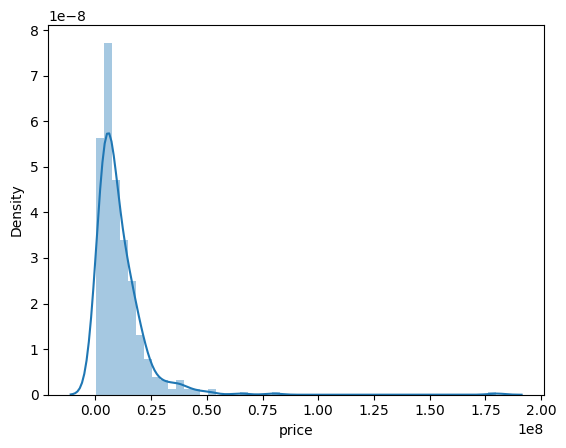

In [42]:
sns.distplot(df["price"])

<p>Nhận xét</p>

*   Đường mật độ đạt đỉnh ở mức giá thấp (gần 0), điều này phản ánh rằng phần lớn các laptop có giá rơi vào khoảng thấp hơn (dưới 5-10 triệu).
*   Đuôi của phân phối kéo dài, cho thấy sự hiện diện của các giá trị lớn hơn nhưng ít phổ biến.





### 'brand', 'card', 'processor', 'hard_driver_kind', 'card', 'made_in'

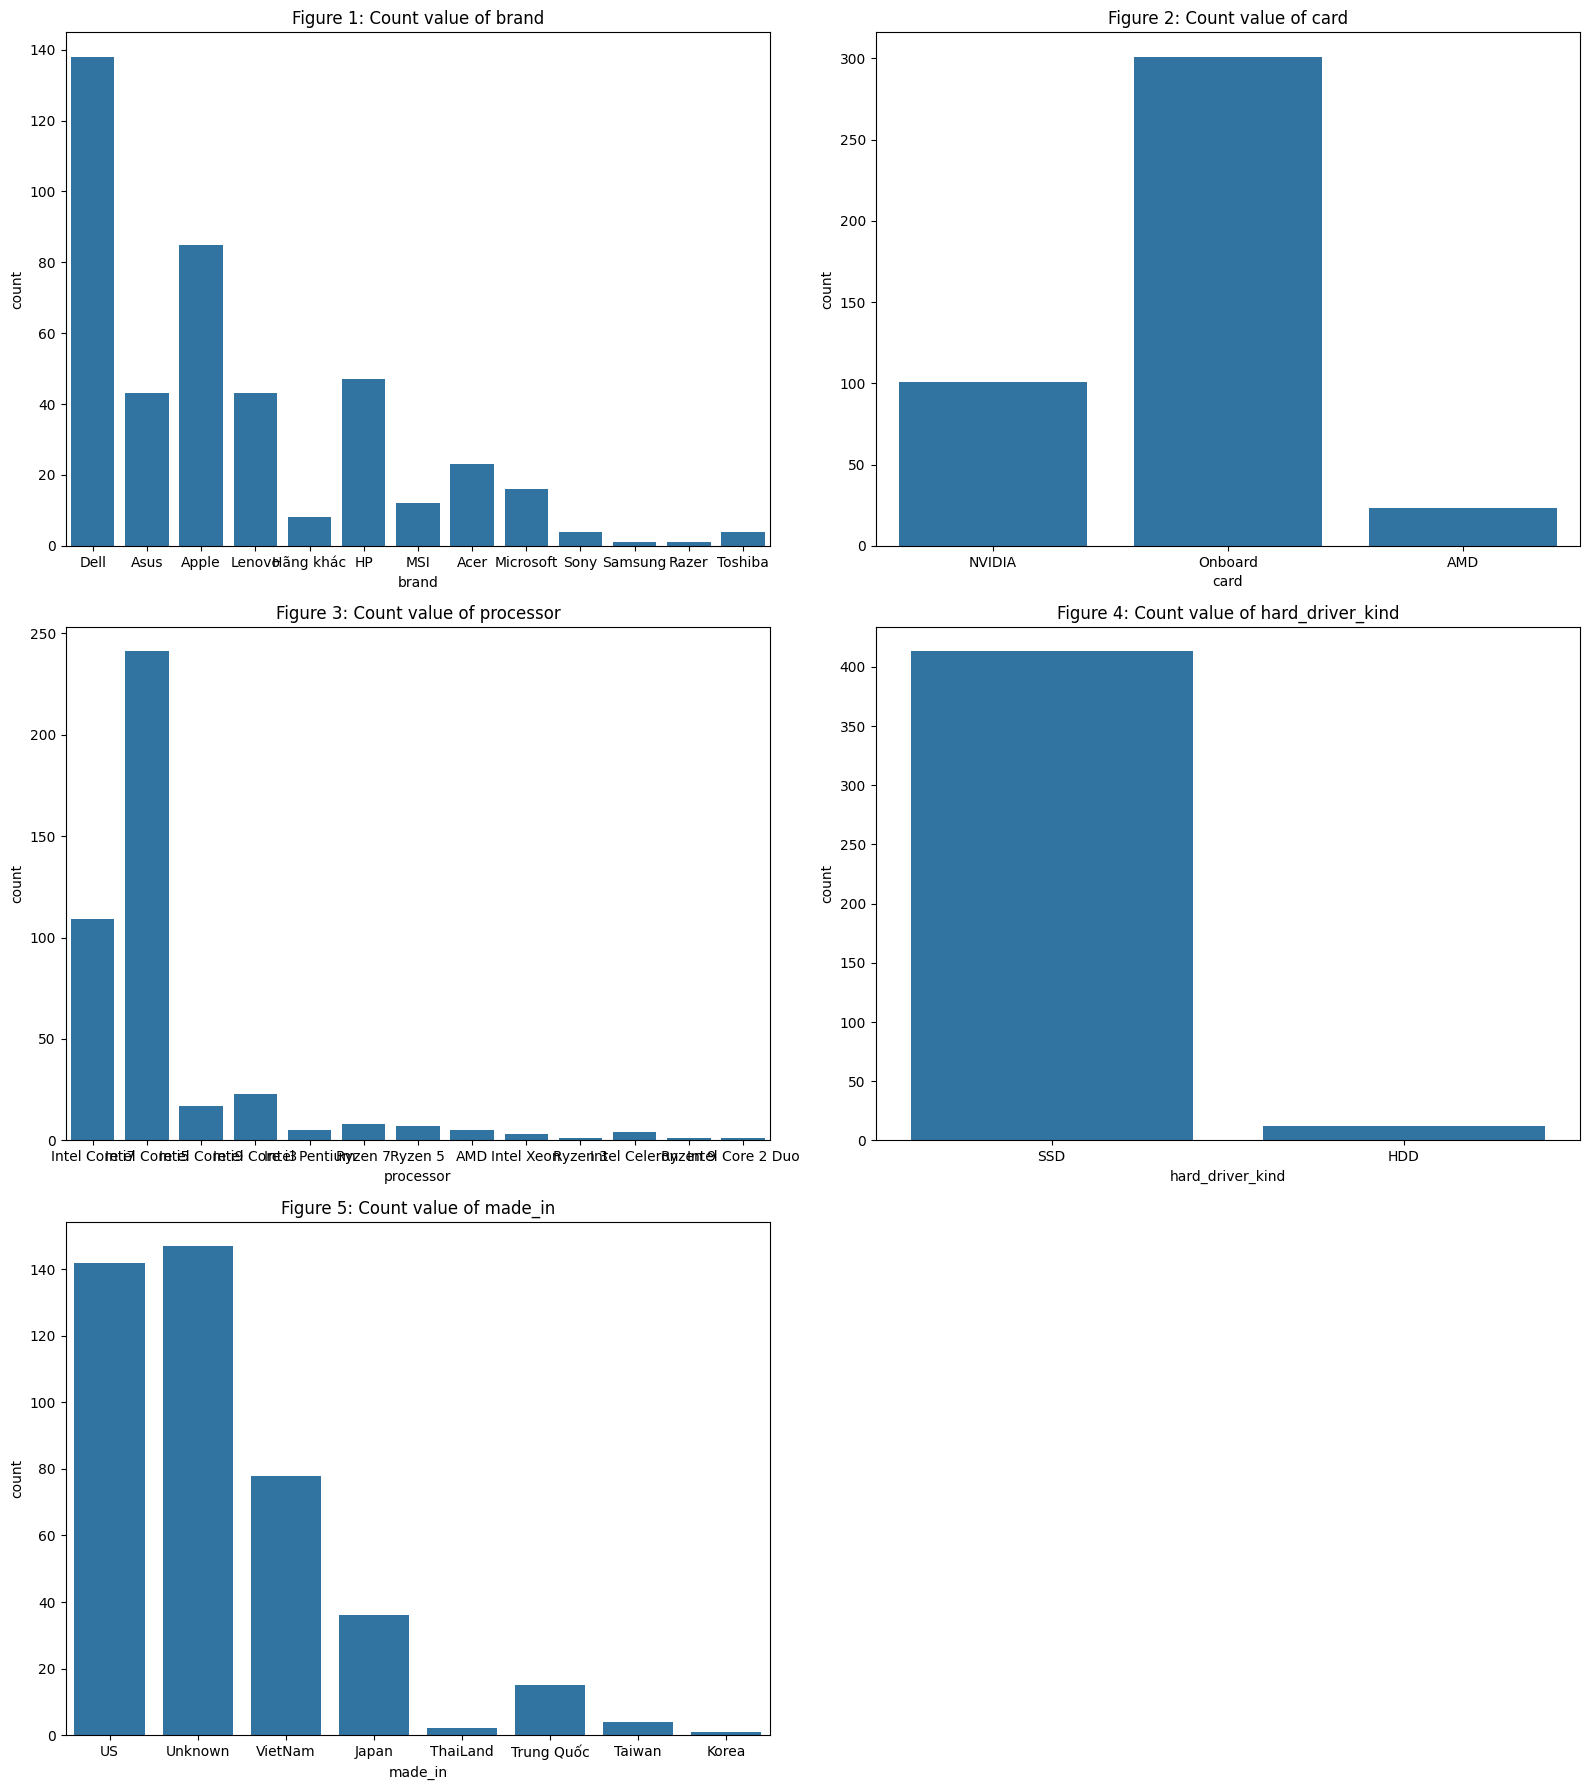

In [43]:
import math
# Danh sách các cột phân loại
features_count_cate = ['brand', 'card', 'processor', 'hard_driver_kind', 'made_in']

# Tính toán số hàng và số cột tự động
n_features = len(features_count_cate)
n_cols = 2
n_rows = math.ceil(n_features / n_cols)

# Tạo figure và axes
fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols * 8, n_rows * 6))

# Flatten axes để dễ truy cập
ax = ax.flatten()

# Lặp qua từng feature để vẽ biểu đồ
for i, feature in enumerate(features_count_cate):
    sns.countplot(data=df, x=feature, ax=ax[i])
    ax[i].set_title(f'Figure {i+1}: Count value of {feature}')

# Ẩn các subplot còn dư
for j in range(len(features_count_cate), len(ax)):
    ax[j].set_visible(False)

# Bố cục gọn gàng
plt.tight_layout()
plt.show()

<ipython-input-44-3668296f0fd2>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=feature, y='price', estimator=np.mean, ax=ax_i, palette="viridis")
<ipython-input-44-3668296f0fd2>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=feature, y='price', estimator=np.mean, ax=ax_i, palette="viridis")
<ipython-input-44-3668296f0fd2>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=feature, y='price', estimator=np.mean, ax=ax_i, palette="viridis")
<ipython-input-44-3668296f0fd2>:20: FutureWarning: 

Passing `palet

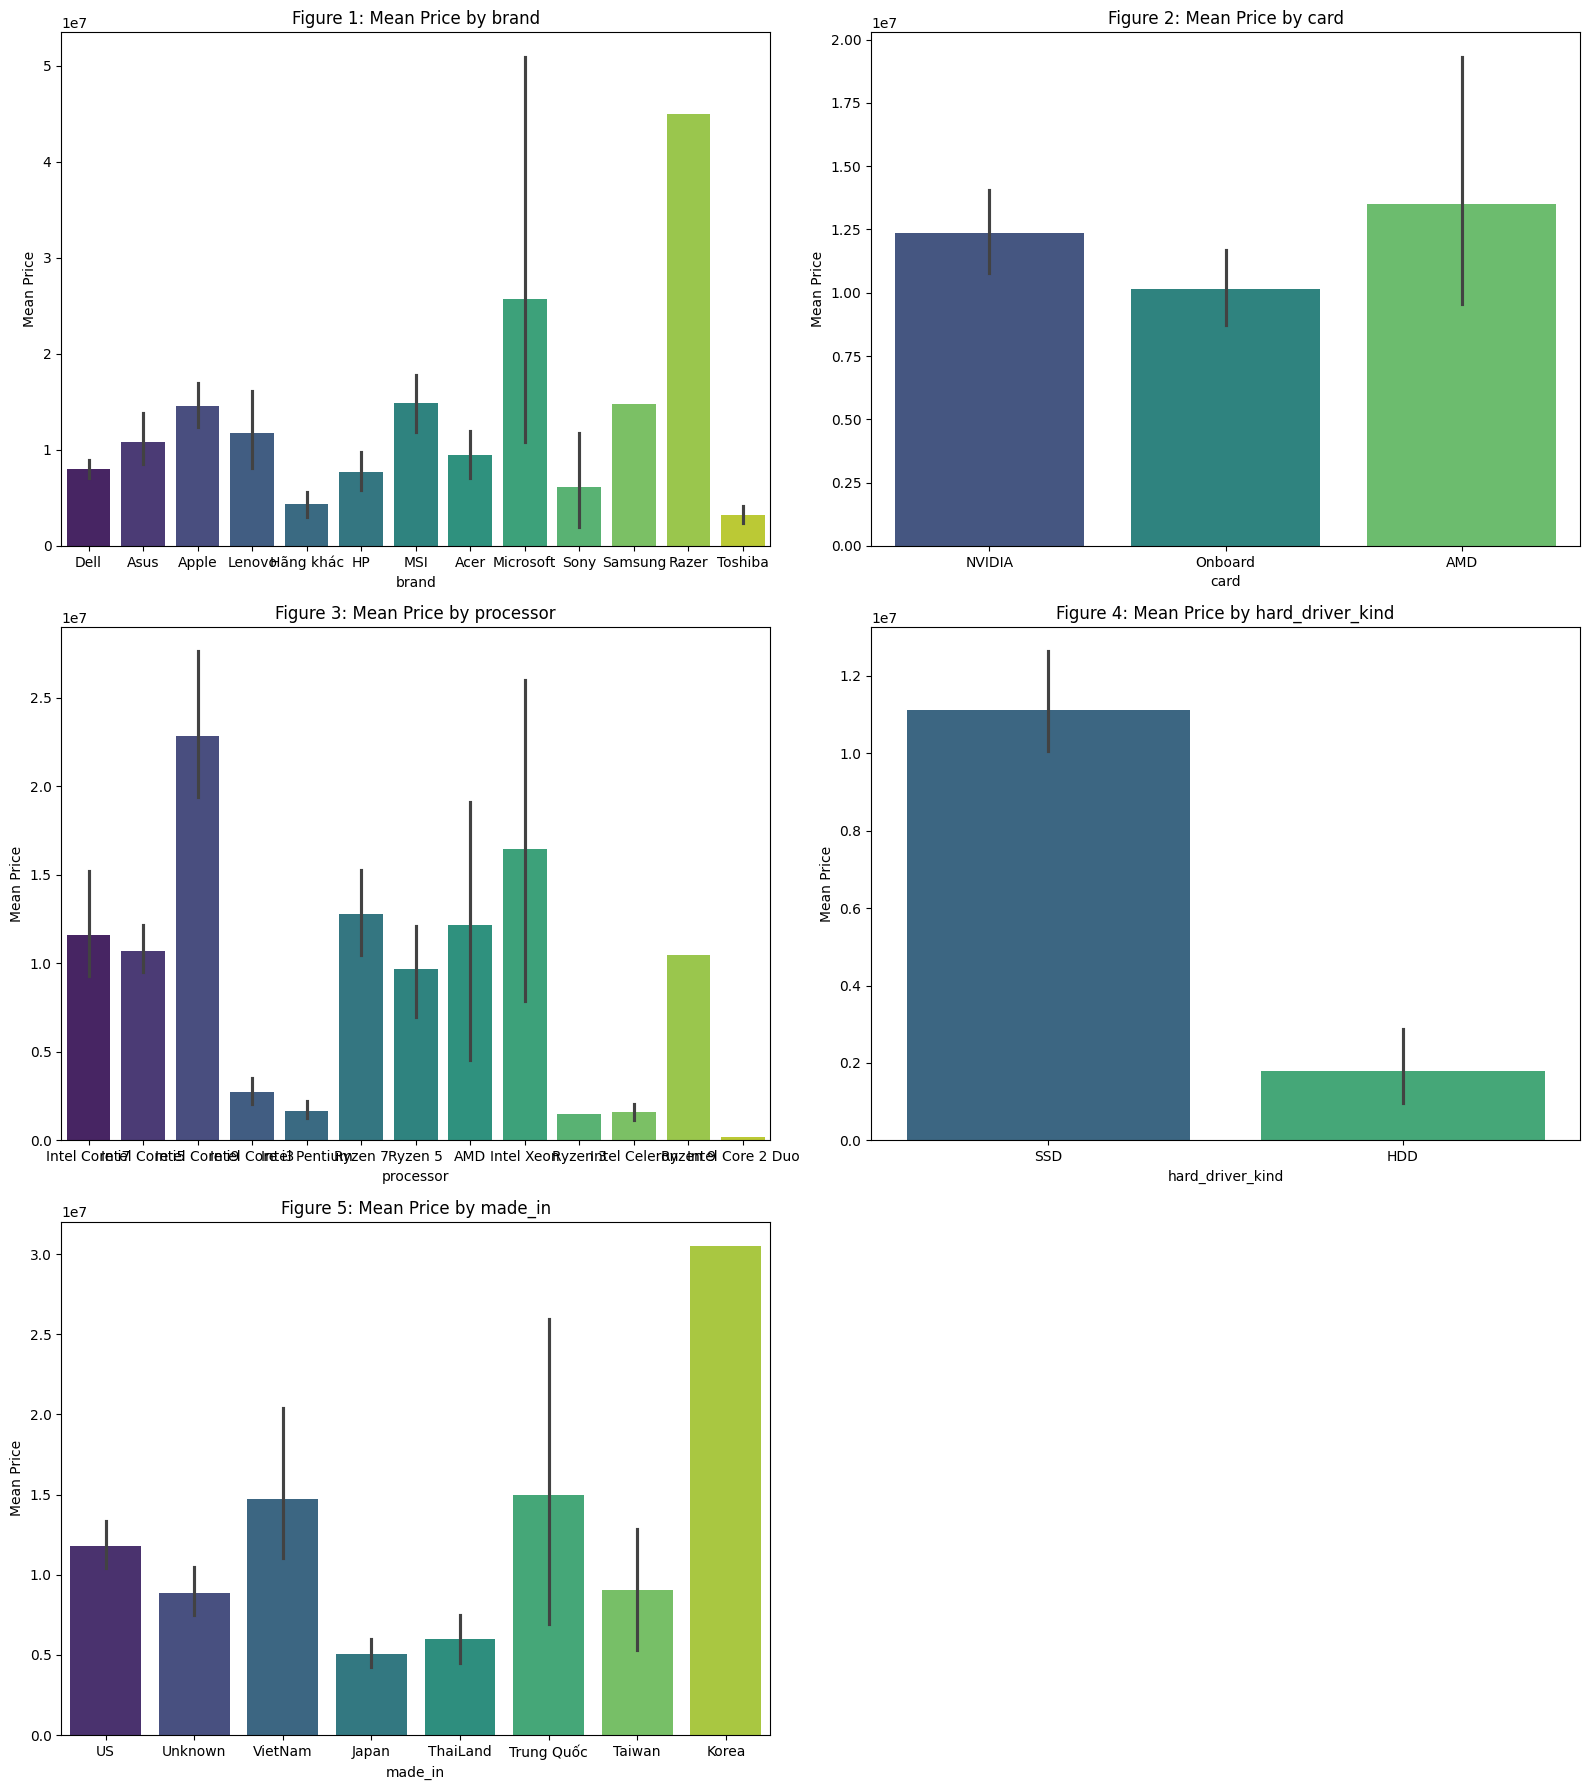

In [44]:
import seaborn as sns
import math

features_bar_cat = ['brand', 'card', 'processor', 'hard_driver_kind', 'made_in']

# Tự động tính số hàng và cột
n_cols = 2
n_rows = math.ceil(len(features_bar_cat) / n_cols)  # Số hàng dựa trên số cột và số thuộc tính

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols * 8, n_rows * 6))

# Duyệt qua từng thuộc tính trong features_bar_cat
for i, feature in enumerate(features_bar_cat):
    r, c = divmod(i, n_cols)  # Tính hàng và cột hiện tại
    ax_i = ax[r, c] if n_rows > 1 else ax[c]  # Đảm bảo hỗ trợ 1 hàng

    # Kiểm tra nếu thuộc tính tồn tại trong DataFrame
    if feature in df.columns:
        # Sử dụng palette để thêm màu sắc đa dạng
        sns.barplot(data=df, x=feature, y='price', estimator=np.mean, ax=ax_i, palette="viridis")
        ax_i.set_title(f'Figure {i + 1}: Mean Price by {feature}')
        ax_i.set_xlabel(feature)
        ax_i.set_ylabel('Mean Price')
    else:
        ax_i.axis('off')  # Ẩn subplot nếu không có thuộc tính trong DataFrame
        ax_i.set_title(f'Figure {i + 1}: {feature} not found in DataFrame')

# Xóa subplot thừa nếu tổng số thuộc tính < n_rows * n_cols
for j in range(len(features_bar_cat), n_rows * n_cols):
    r, c = divmod(j, n_cols)
    ax[r, c].axis('off')

plt.tight_layout()
plt.show()

- company: Giá trung bình của laptop ở các công ty tập khoảng 6-13tr
- cpu   : Intel là phổ biến những giá trung bình thấp hơn của ADM
- processor: Giá trung bình của ryzen 5 và ryzen 7 sẽ nhỉnh hơn
- Các cột còn lại đa số là cân bằng về trung bình giá giữa các loại biến trong cột

### 'screen_size', 'ram',  'hard_driver', 'warranty'

<function matplotlib.pyplot.show(close=None, block=None)>

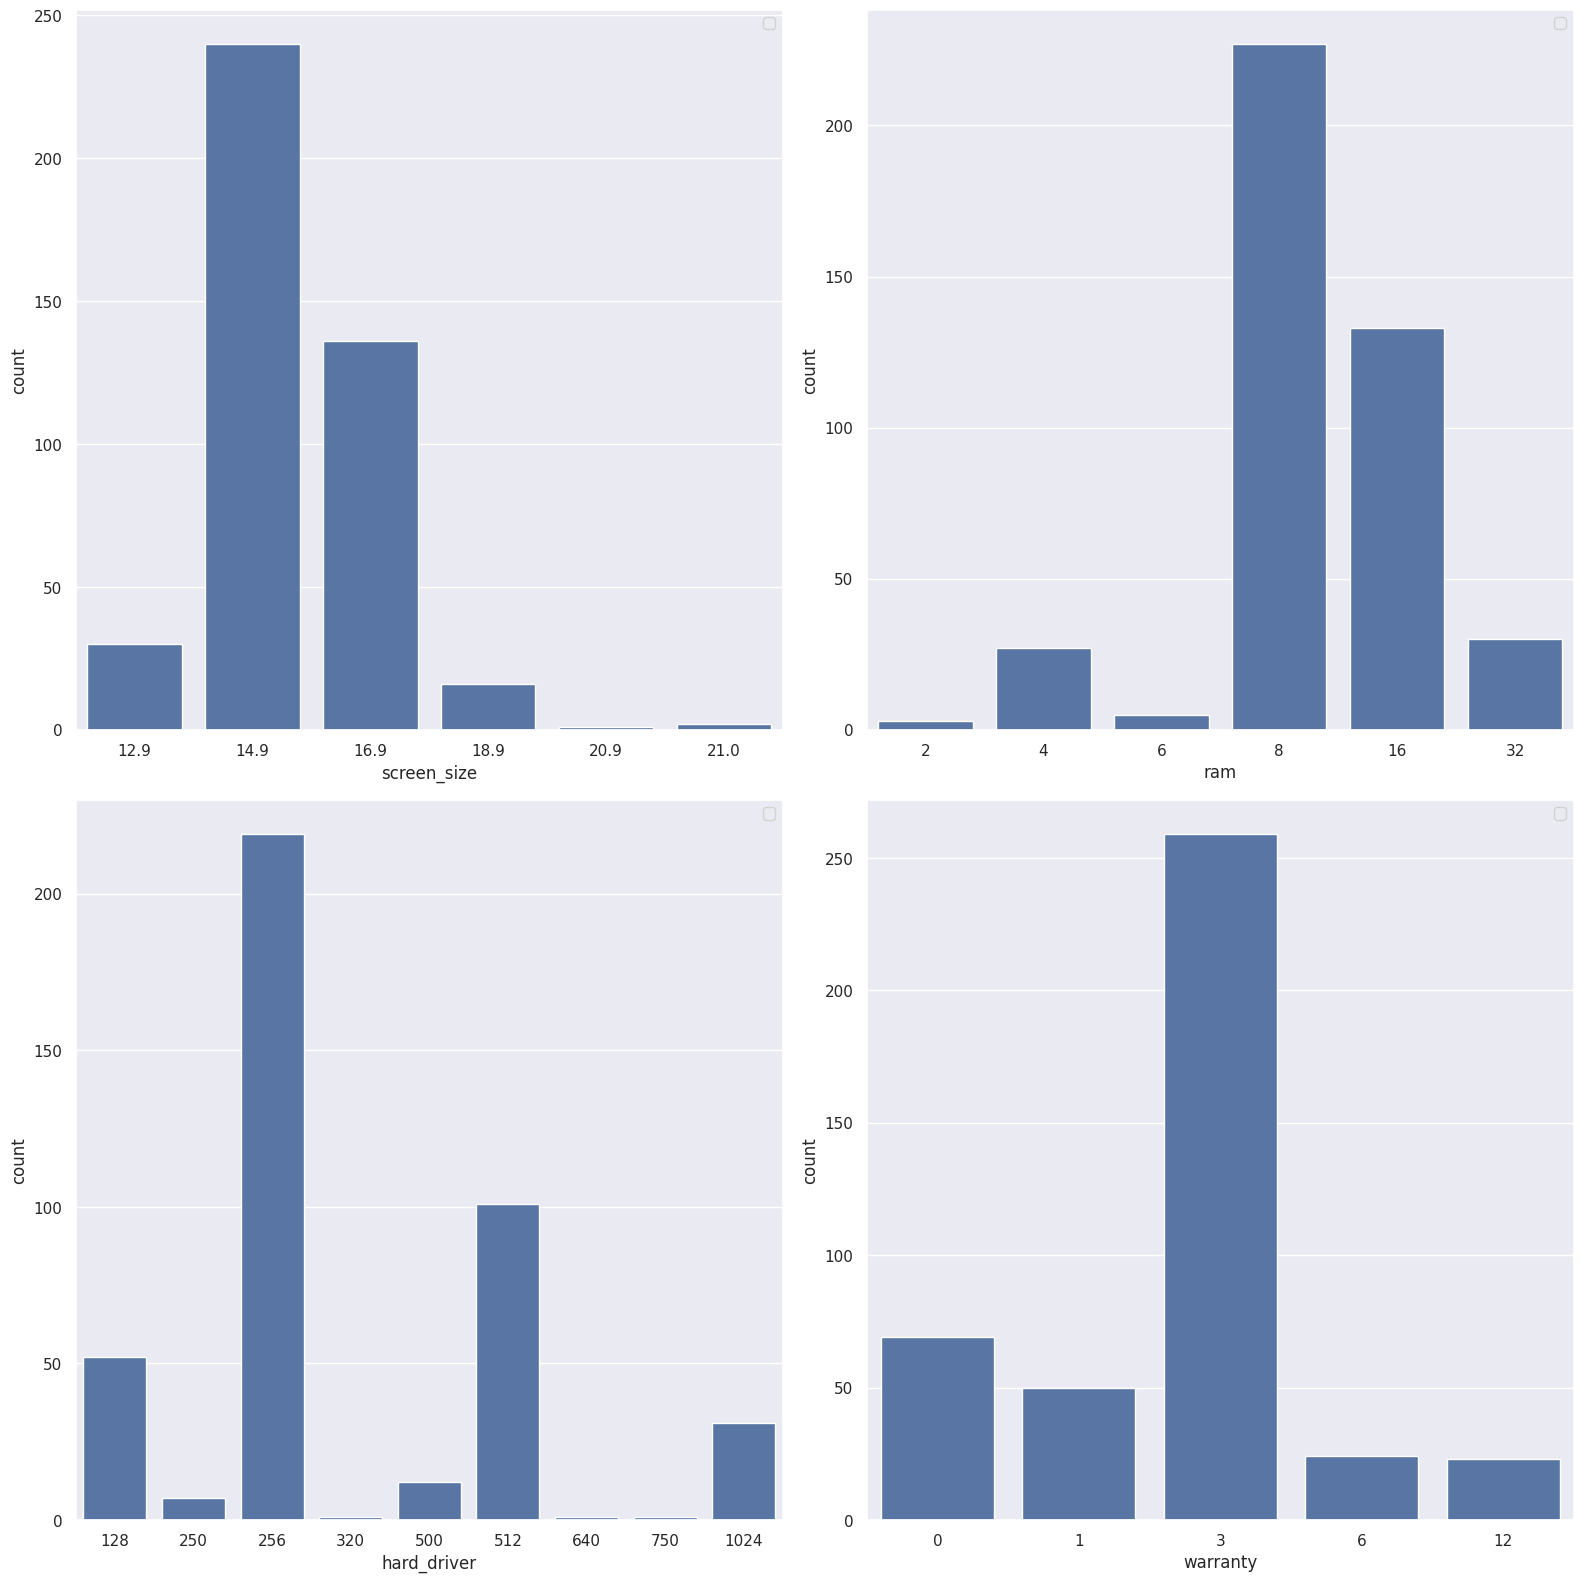

In [45]:
sns.set_theme()
features_dis_num = ['screen_size', 'ram', 'hard_driver', 'warranty']

n_rows = 2
n_cols = 2

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*8, n_rows*8))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c
        if i < len(features_dis_num):
            ax_i = ax[r, c]
            sns.countplot(data = df, x = features_dis_num[i], ax = ax_i)
            ax_i.legend(title = '', loc='upper right')
plt.tight_layout()
plt.show

- Số lượng các loại trong từng cột biến số

<function matplotlib.pyplot.show(close=None, block=None)>

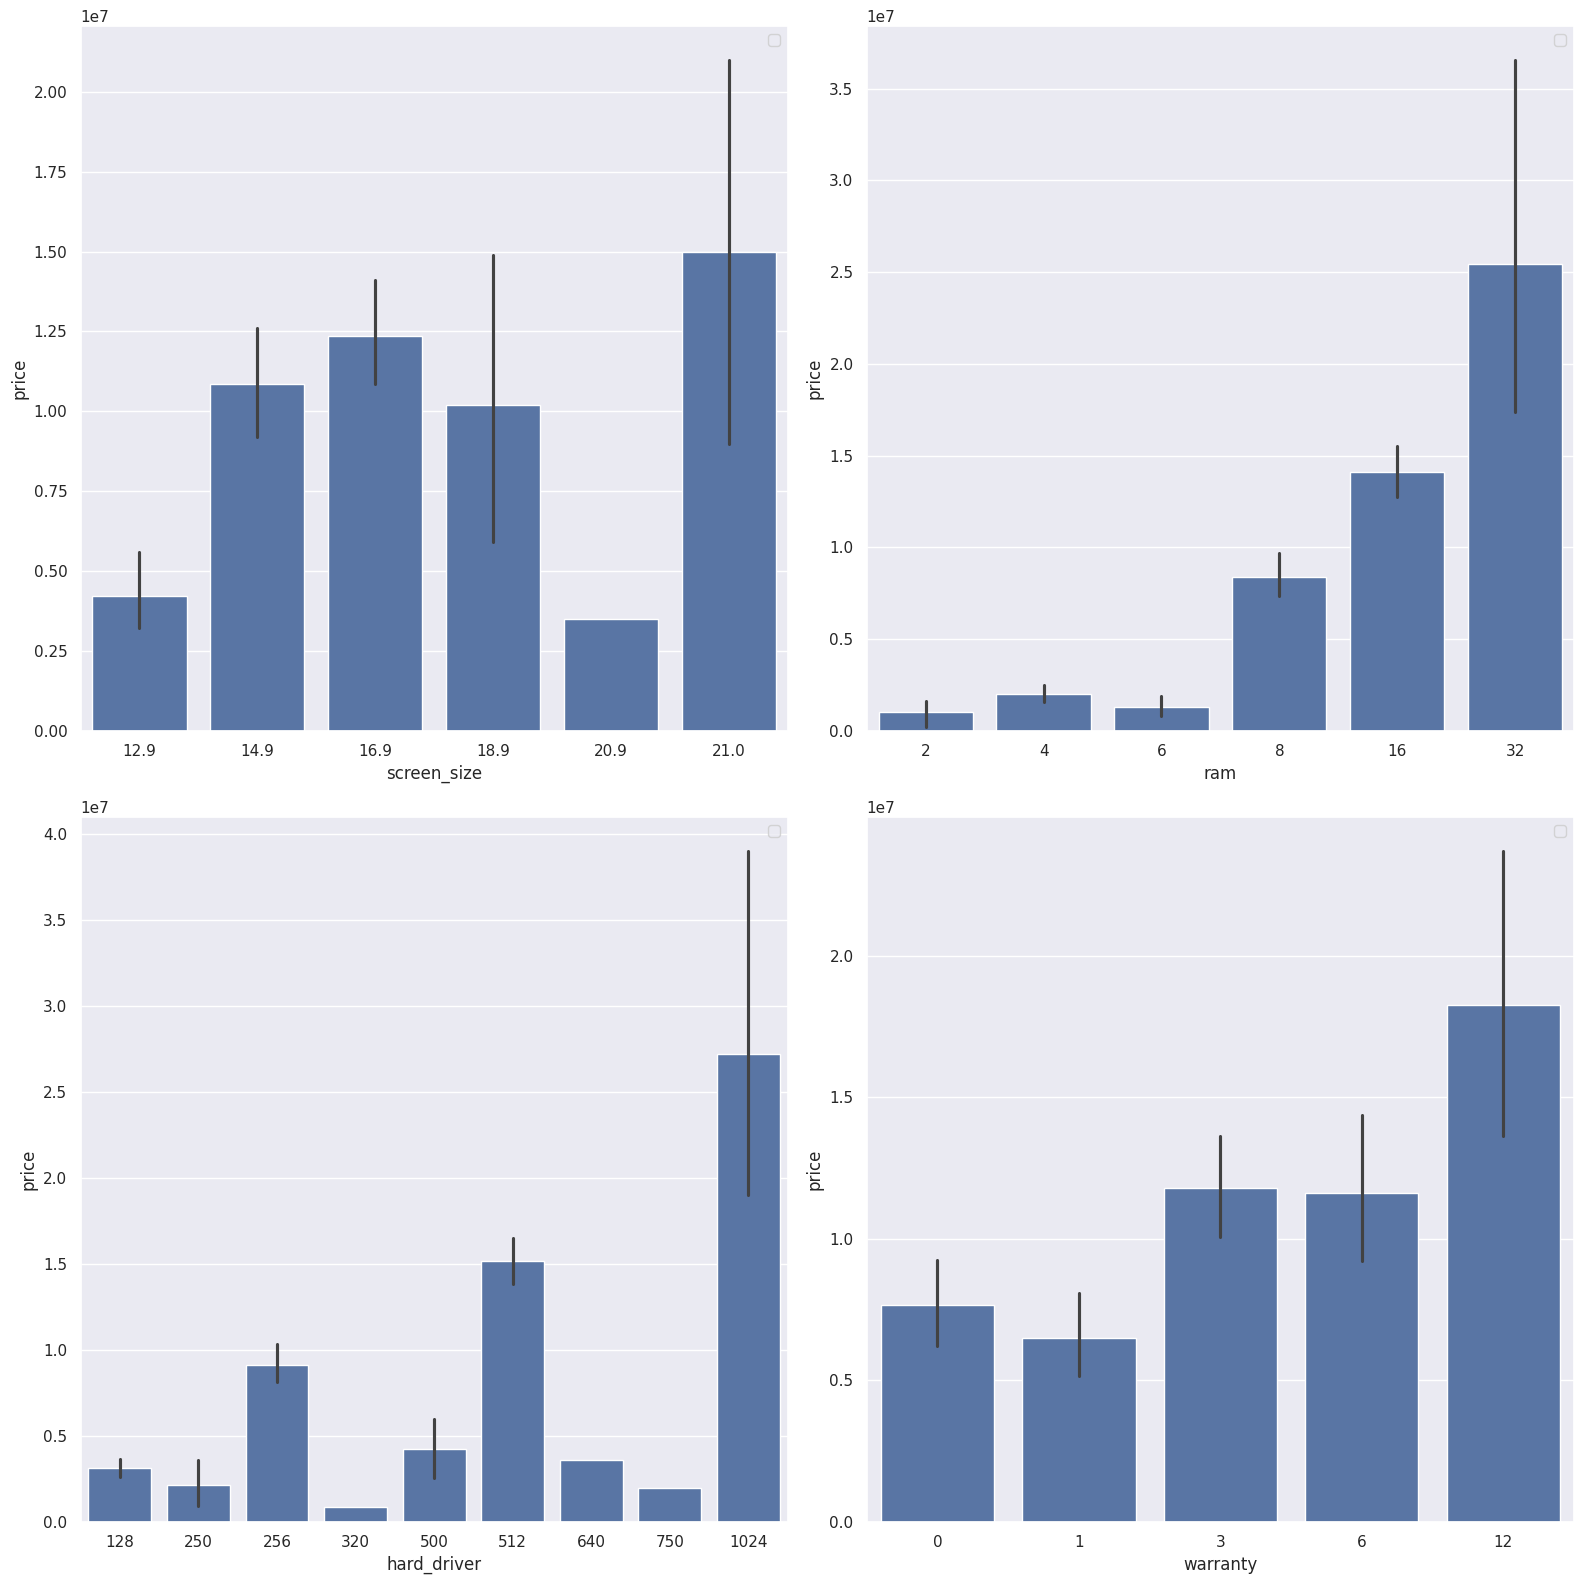

In [46]:
sns.set_theme()
features_bar_num = ['screen_size', 'ram', 'hard_driver', 'warranty']

n_rows = 2
n_cols = 2

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*8, n_rows*8))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c
        if i < len(features_bar_num):
            ax_i = ax[r, c]
            sns.barplot(data = df, x = features_bar_num[i], y = 'price', estimator=np.mean, ax = ax_i)
            ax_i.legend(title = '', loc='upper right')
plt.tight_layout()
plt.show

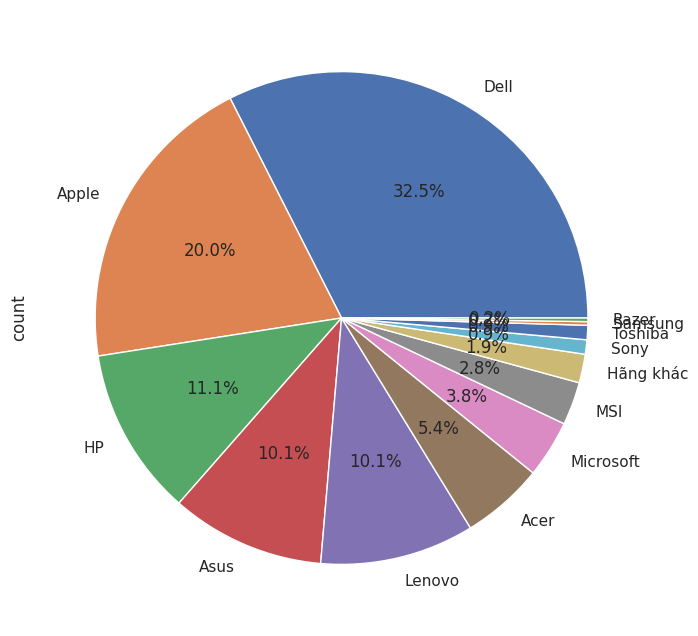

In [47]:
df_company = df["brand"].value_counts()
df_company.plot(kind='pie',
                   figsize=(8,8),
                   autopct='%1.1f%%')
plt.show()

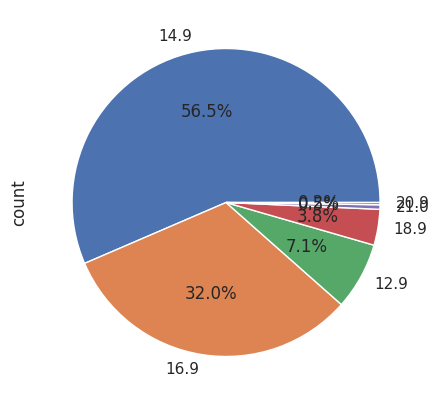

In [48]:
df_screen_size = df["screen_size"].value_counts()
df_screen_size.plot(kind='pie',
                   figsize=(5,5),
                   autopct='%1.1f%%')
plt.show()

In [49]:
df.head(3)

,brand,model,condition,warranty,screen_size,processor,ram,card,hard_driver,made_in,hard_driver_kind,price
0,Dell,Latitude,Đã sử dụng (chưa sửa chữa),3,16.9,Intel Core i7,16,NVIDIA,256,US,SSD,7600000
1,Asus,Dòng Khác,Đã sử dụng (chưa sửa chữa),3,16.9,Intel Core i5,8,NVIDIA,256,Unknown,SSD,5400000
2,Dell,Latitude,Đã sử dụng (chưa sửa chữa),3,12.9,Intel Core i5,8,Onboard,256,US,SSD,3950000


In [50]:
df.describe()

,warranty,screen_size,ram,hard_driver,price
count,425.000000,425.000000,425.000000,425.000000,4.250000e+02
mean,2.934118,15.592235,11.877647,366.202353,1.084514e+07
std,2.614435,1.396394,6.861438,226.251668,1.260516e+07
min,0.000000,12.900000,2.000000,128.000000,2.000000e+05
25%,1.000000,14.900000,8.000000,256.000000,4.500000e+06
50%,3.000000,14.900000,8.000000,256.000000,7.500000e+06
75%,3.000000,16.900000,16.000000,512.000000,1.395000e+07
max,12.000000,21.000000,32.000000,1024.000000,1.800000e+08


### Độ tương quan

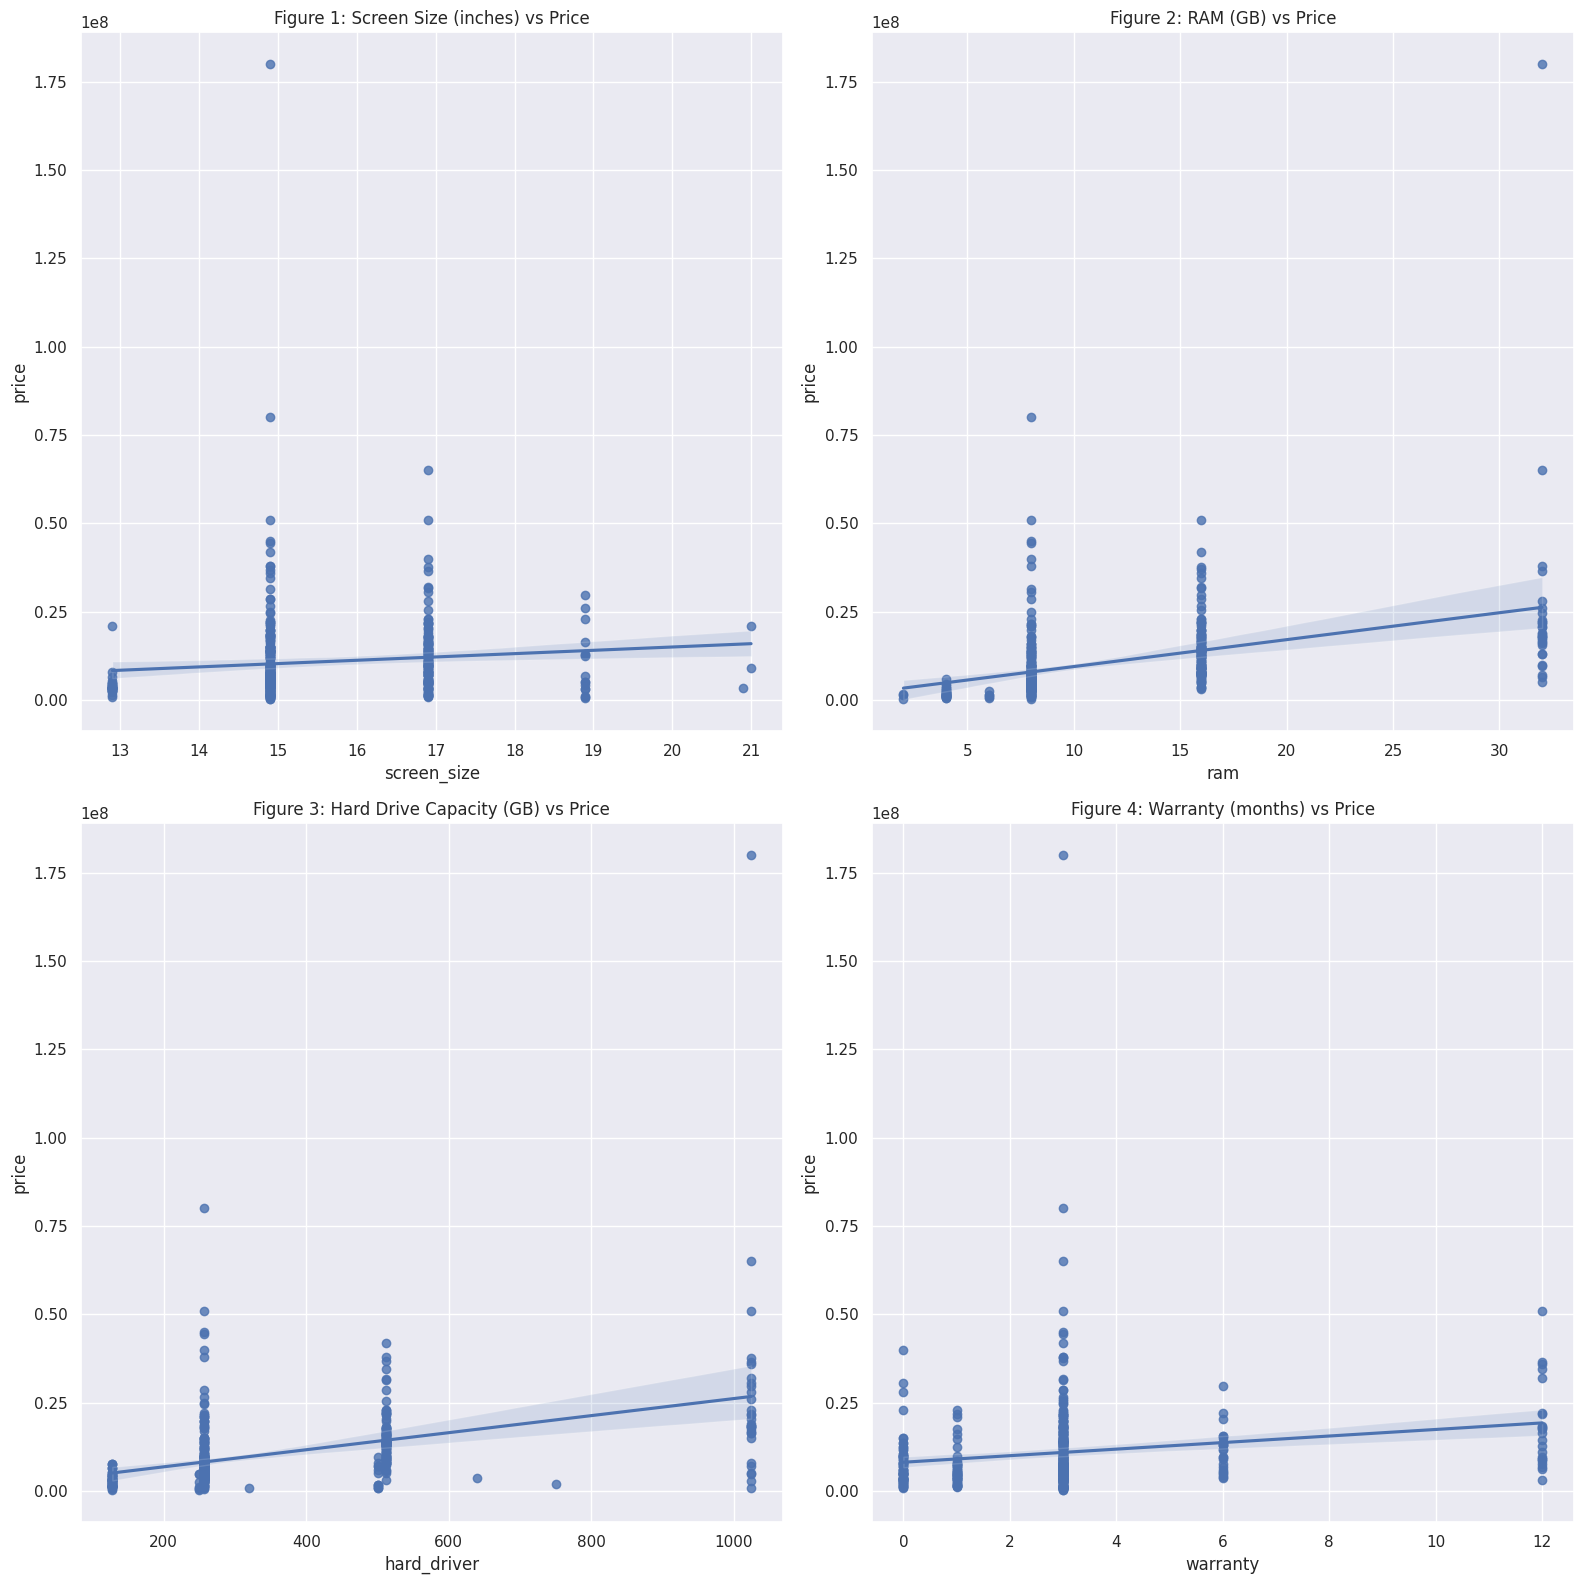

In [51]:
features_reg = ['screen_size', 'ram', 'hard_driver', 'warranty']
features_dis = ['Screen Size (inches)', 'RAM (GB)', 'Hard Drive Capacity (GB)', 'Warranty (months)']

n_rows = 2
n_cols = 2

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*8, n_rows*8))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r * n_cols + c
        if i < len(features_reg):
            ax_i = ax[r, c]
            sns.regplot(data=df, x=features_reg[i], y="price", ax=ax_i)
            ax_i.set_title(f'Figure {i+1}: {features_dis[i]} vs Price')  # Sử dụng features_dis
plt.tight_layout()
plt.show()

-  Tương quan mạnh giữa các biến với nhau

- Đồ thị boxplot giúp quan sát các giá tri median, IQR(khoảng tứ phân vị), MAX, MIN

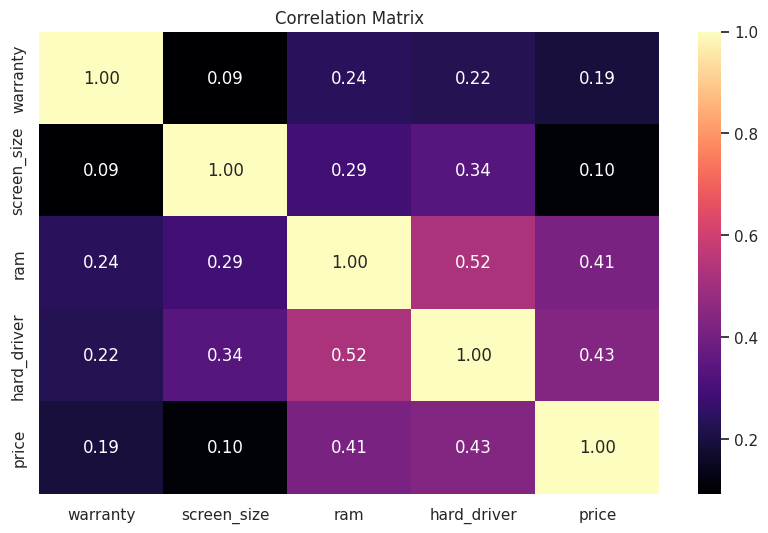

In [52]:
# Chọn các cột số trong DataFrame
numerical_df = df.select_dtypes(include=['number'])

# Tính ma trận tương quan cho các cột số
correlation_matrix = numerical_df.corr()

# Vẽ biểu đồ heatmap với bảng màu "magma" (hoặc tùy chọn bảng màu khác)
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="magma", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

- Heatmap: thể hiện mối tương quan giữa 2 biến thông qua màu sắc

#  3. Training Model Machine Learning

## Khởi tạo bộ dữ liệu train, test

In [55]:
X = df.drop(columns={"price"})
Y = df["price"]

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state = 42)

In [57]:
X_train.head()

,brand,model,condition,warranty,screen_size,processor,ram,card,hard_driver,made_in,hard_driver_kind
495,Asus,VivoBook Seriers,Đã sử dụng (chưa sửa chữa),0,16.9,Ryzen 5,8,AMD,256,Trung Quốc,SSD
25,Acer,Aspire,Mới,3,16.9,Intel Core i7,8,Onboard,512,VietNam,SSD
244,Apple,MacBook Pro,Đã sử dụng (chưa sửa chữa),3,14.9,Intel Core i7,32,AMD,1024,Unknown,SSD
251,Apple,MacBook Air,Đã sử dụng (chưa sửa chữa),1,14.9,Intel Core i5,8,Onboard,128,VietNam,SSD
246,Dell,Precision,Đã sử dụng (chưa sửa chữa),6,18.9,Intel Core i7,32,NVIDIA,256,Unknown,SSD


In [58]:
Y_train.head()

,price
495,6000000
25,10990000
244,18500000
251,7500000
246,4999000


#### Define Tranformer -> Encoder var

In [59]:
# Create value num_feature and cat_feature
num_feature = ["warranty", "screen_size", "ram", "hard_driver"]
cat_feature = ["brand", "model", "condition", "processor", "card", "made_in","hard_driver_kind"]

In [60]:
# preprocess pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#define
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [61]:
#define preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_feature),
    ('cat', cat_transformer, cat_feature)
])

In [62]:
preprocessor.fit(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['warranty', 'screen_size', 'ram',
                                  'hard_driver']),
                                ('cat',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['brand', 'model', 'condition', 'processor',
                                  'card', 'made_in', 'hard_driver_kind'])])

In [63]:
X = preprocessor.transform(X)

In [64]:
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

## RandomForestRegressor

In [65]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

rf_model = RandomForestRegressor(random_state = 1)

In [66]:
rf_model.fit(X_train, Y_train)

RandomForestRegressor(random_state=1)

In [67]:
df_random = pd.DataFrame({'y_test':Y_test.head(5), 'rf_test_predict':rf_model.predict(X_test[0:5])})
df_random

,y_test,rf_test_predict
582,8000000,5.706300e+06
100,4700000,6.742853e+06
247,14500000,1.587777e+07
30,2800000,2.203740e+06
490,6300000,4.101081e+06


### Import thư viện để thực hiện kiểm chứng chéo

In [68]:
from sklearn.model_selection import cross_val_score

### Tính r2 và MAE trung bình

In [69]:
r2_score_rf = cross_val_score(RandomForestRegressor(random_state = 1), X_train, Y_train, scoring='r2', cv=3).mean()
meanAbs_rf = abs(cross_val_score(RandomForestRegressor(random_state = 1), X_train, Y_train, scoring='neg_mean_absolute_error', cv=3).mean())
r2_score_rf, meanAbs_rf

(0.2671269345068415, 4645557.433565941)

### Tạo list lưu kết quả

In [70]:
r2_scores = []
mean_abs = []
name_model = []

### Lưu kết quả r2 , MAE và tên model

In [71]:
r2_scores.append(r2_score_rf)
mean_abs.append(meanAbs_rf)
name_model.append('rf')

### Lưu model thành 1 file .joblib

In [72]:
from joblib import dump

# Lưu RandomForestRegressor
dump(rf_model, 'random_forest_model.joblib')

['random_forest_model.joblib']

## DecisionTreeRegressor

In [73]:
from sklearn.tree import DecisionTreeRegressor

In [74]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, Y_train)

DecisionTreeRegressor()

### Tính r2 và MAE trung bình

In [75]:
r2_score_decs = cross_val_score(DecisionTreeRegressor(), X_train, Y_train, scoring='r2', cv=3).mean()
meanAbs_decs = abs(cross_val_score(DecisionTreeRegressor(), X_train, Y_train, scoring='neg_mean_absolute_error', cv=3).mean())
r2_score_decs, meanAbs_decs

(-0.01095111284536702, 5375283.914566661)

### Lưu kết quả r2 , MAE và tên model

In [76]:
r2_scores.append(r2_score_decs)
mean_abs.append(meanAbs_decs)
name_model.append('Decs')

### Lưu model thành 1 file .joblib

In [77]:
from joblib import dump

# Lưu DecisionTreeRegressor
dump(decision_tree, 'decision_tree_model.joblib')

['decision_tree_model.joblib']

## LogisticRegression

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, Y_train)

LogisticRegression()

### Tính r2 và MAE trung bình

In [80]:
r2_score_logis = cross_val_score(LogisticRegression(), X_train, Y_train, scoring='r2', cv=3).mean()
meanAbs_logis = abs(cross_val_score(LogisticRegression(), X_train, Y_train, scoring='neg_mean_absolute_error', cv=3).mean())
r2_score_logis, meanAbs_logis

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


(0.09035910401157128, 5102854.715312213)

### Lưu kết quả r2 , MAE và tên model

In [81]:
r2_scores.append(r2_score_logis)
mean_abs.append(meanAbs_logis)
name_model.append('Logis')

### Lưu model thành 1 file .joblib

In [82]:
from joblib import dump

# Lưu LogisticRegression
dump(logistic_reg, 'logistic_regression_model.joblib')

['logistic_regression_model.joblib']

## Linear regression Model

In [83]:
from sklearn.linear_model import LinearRegression

In [84]:
linear_reg=LinearRegression()
linear_reg.fit(X_train, Y_train)

LinearRegression()

#### Tính r2 và MAE trung bình

In [85]:
r2_score_linear = cross_val_score(LinearRegression(), X_train, Y_train, scoring='r2', cv=3).mean()
meanAbs_linear = abs(cross_val_score(LinearRegression(), X_train, Y_train, scoring='neg_mean_absolute_error', cv=3).mean())
r2_score_linear, meanAbs_linear

(0.2426800747531038, 5346079.441899293)

#### Lưu kết quả r2 , MAE và tên model

In [86]:
r2_scores.append(r2_score_linear)
mean_abs.append(meanAbs_linear)
name_model.append('Linear')

### Lưu model thành 1 file .joblib

In [87]:
from joblib import dump

# Lưu LogisticRegression
dump(linear_reg, 'linear_regression_model.joblib')

['linear_regression_model.joblib']

## KNN

In [88]:
from sklearn.neighbors import KNeighborsRegressor

In [89]:
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, Y_train)

KNeighborsRegressor()

### Tính r2 và MAE trung bình

In [90]:
r2_score_knn = cross_val_score(KNeighborsRegressor(), X_train, Y_train, scoring='r2', cv=3).mean()
meanAbs_knn = abs(cross_val_score(KNeighborsRegressor(), X_train, Y_train, scoring='neg_mean_absolute_error', cv=3).mean())
r2_score_knn, meanAbs_knn

(0.2779103810371656, 5155433.075918273)

### Lưu kết quả r2 , MAE và tên model

In [91]:
r2_scores.append(r2_score_knn)
mean_abs.append(meanAbs_knn)
name_model.append('KNN')

### Lưu model thành 1 file .joblib

In [92]:
from joblib import dump

# Lưu KNeighborsRegressor
dump(knn_reg, 'knn_model.joblib')

['knn_model.joblib']

## Ridge

In [93]:
from sklearn.linear_model import Ridge

In [94]:
ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X_train, Y_train)

Ridge(alpha=10)

### Tính r2 và MAE trung bình

In [95]:
r2_score_rid = cross_val_score(Ridge(alpha=10), X_train, Y_train, scoring='r2', cv=3).mean()
meanAbs_rid = abs(cross_val_score(Ridge(alpha=10), X_train, Y_train, scoring='neg_mean_absolute_error', cv=3).mean())
r2_score_rid, meanAbs_rid

(0.37122779284533997, 4854369.123084041)

In [96]:
df_ridge = pd.DataFrame({'y_test':Y_test, 'ridge_test_predict':ridge_reg.predict(X_test)})

### Lưu kết quả r2 , MAE và tên model

In [97]:
r2_scores.append(r2_score_rid)
mean_abs.append(meanAbs_rid)
name_model.append('Ridge')

### Lưu model thành 1 file .joblib

In [98]:
from joblib import dump

# Lưu Ridge
dump(ridge_reg, 'ridge_model.joblib')

['ridge_model.joblib']

## Kết quả model

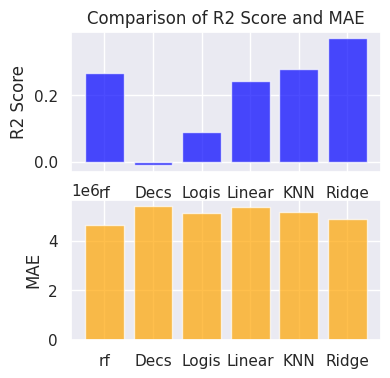

In [99]:
import matplotlib.pyplot as plt
def plot_comparison(indices=name_model, r2 = r2_scores, mean=mean_abs):
    # Vẽ đồ thị
    plt.figure(figsize=(4, 4))

    plt.subplot(2, 1, 1)
    plt.bar(indices, r2_scores, color='blue', alpha=0.7, label='R2 Score')
    plt.title('Comparison of R2 Score and MAE')
    plt.ylabel('R2 Score')
    plt.xticks(indices)

    # Đồ thị MAE values
    plt.subplot(2, 1, 2)
    plt.bar(indices, mean_abs, color='orange', alpha=0.7, label='MAE')
    plt.ylabel('MAE')
    plt.xticks(indices)

    plt.show
plot_comparison()

## Nhận xét kết quả các mô hình
### Mô hình Ridge có giá trị R2 Score cao nhất và MAE tương đối thấp so với những giá trị còn lại => Là mô hình tốt nhất trong 4 mô hình
- R2 score: Phép đo về độ fit của dữ liệu với mô hình đánh giá
- => Độ fit của dữ liệu với mô hình sẽ nằm trong khoảng từ 0 - 1; bằng 0: điểm dữ liệu không cắt đường hồi quy tại bất kì điểm nào; bằng 1: điểm dữ liệu nằm trên đường hồi quy
- => Giá trị càng tiến về một thì sẽ càng fit
- MAE(Mean Absolute Error): Sai số tuyệt đối trung bình (|y0-y_predict0| + |y1-y_predict1| + ...+ |yN-y_predictN|)/N  ( cùng đơn vị với giá laptop)
- => Là sai số giữa kết quả dự đoán ra so với giá trị y_test ban đầu
- => Giá trị càng nhỏ thì sai số càng thấp => mô hình càng tốt


# => Lựa chọn mô hình Ridge làm  mô hình dự đoán giá

# Tạo lựa chọn lựa chọn để dự đoán giá

In [105]:
df.head()

,brand,model,condition,warranty,screen_size,processor,ram,card,hard_driver,made_in,hard_driver_kind,price
0,Dell,Latitude,Đã sử dụng (chưa sửa chữa),3,16.9,Intel Core i7,16,NVIDIA,256,US,SSD,7600000
1,Asus,Dòng Khác,Đã sử dụng (chưa sửa chữa),3,16.9,Intel Core i5,8,NVIDIA,256,Unknown,SSD,5400000
2,Dell,Latitude,Đã sử dụng (chưa sửa chữa),3,12.9,Intel Core i5,8,Onboard,256,US,SSD,3950000
3,Apple,MacBook Pro,Mới,3,16.9,Intel Core i9,16,NVIDIA,512,US,SSD,14500000
4,Lenovo,ThinkPad,Đã sử dụng (chưa sửa chữa),3,14.9,Intel Core i5,8,NVIDIA,256,VietNam,SSD,5990000


## Tạo select và các option

In [110]:
# Khởi tạo widget Select
select_brand = pn.widgets.Select(name='brand', options=list(df['brand'].unique()), value='None')
select_model = pn.widgets.Select(name='model', options=list(df['model'].unique()), value='None')
select_condition = pn.widgets.Select(name='condition', options=list(df['condition'].unique()), value='None')
select_warranty = pn.widgets.Select(name='warranty', options=list(df['warranty'].unique()), value='None')
select_screen_size = pn.widgets.Select(name='screen_size', options=list(df['screen_size'].unique()), value='None')
select_processor = pn.widgets.Select(name='processor', options=list(df['processor'].unique()), value='None')
select_ram = pn.widgets.Select(name='ram', options=list(df['ram'].unique()), value='None')
select_card = pn.widgets.Select(name='card', options=list(df['card'].unique()), value='None')
select_hard_driver = pn.widgets.Select(name='hard_driver', options=list(df['hard_driver'].unique()), value='None')
select_made_in = pn.widgets.Select(name='made_in', options=list(df['made_in'].unique()), value='None')
select_hard_driver_kind = pn.widgets.Select(name='hard_driver_kind', options=list(df['hard_driver_kind'].unique()), value='None')

## Kết nối tới các widget Select để cập nhật list khi lựa chon option khác

In [111]:
selected_values = [None] * 11

# Callback function để cập nhật giá trị khi người dùng chọn
def update_selected_values(event, index):
    selected_values[index] = event.new

# Kết nối callback với sự kiện 'value' của từng widget Select
select_brand.param.watch(lambda event: update_selected_values(event, 0), 'value')
select_model.param.watch(lambda event: update_selected_values(event, 1), 'value')
select_condition.param.watch(lambda event: update_selected_values(event, 2), 'value')
select_warranty.param.watch(lambda event: update_selected_values(event, 3), 'value')
select_screen_size.param.watch(lambda event: update_selected_values(event, 4), 'value')
select_processor.param.watch(lambda event: update_selected_values(event, 5), 'value')
select_ram.param.watch(lambda event: update_selected_values(event, 6), 'value')
select_card.param.watch(lambda event: update_selected_values(event, 7), 'value')
select_hard_driver.param.watch(lambda event: update_selected_values(event, 8), 'value')
select_made_in.param.watch(lambda event: update_selected_values(event, 9), 'value')
select_hard_driver_kind.param.watch(lambda event: update_selected_values(event, 10), 'value')


# Hiển thị widgets
pn.Column(
    select_brand, select_model, select_processor, select_hard_driver_kind,
    select_screen_size, select_ram, select_card,
    select_hard_driver, select_made_in, select_warranty
)

Column
    [0] Select(name='brand', options=['Dell', 'Asus', ...], value='Dell')
    [1] Select(name='model', options=['Latitude', 'Dòng Khác', ...], value='Latitude')
    [2] Select(name='processor', options=['Intel Core i7', ...], value='Intel Core i7')
    [3] Select(name='hard_driver_kind', options=['SSD', 'HDD'], value='SSD')
    [4] Select(name='screen_size', options=[16.9, 12.9, 14.9, ...], value=16.9)
    [5] Select(name='ram', options=[16, 8, 4, 32, 6, 2], value=16)
    [6] Select(name='card', options=['NVIDIA', 'Onboard', ...], value='NVIDIA')
    [7] Select(name='hard_driver', options=[256, 512, 128, ...], value=256)
    [8] Select(name='made_in', options=['US', 'Unknown', ...], value='US')
    [9] Select(name='warranty', options=[3, 1, 6, 12, 0], value=3)

### Lựa chọn các select mà mình muốn dự đoán chiếc laptop đó rồi chạy lại 2 dòng bên dưới

In [112]:
selected_values

['Apple',
 'Latitude',
 None,
 12,
 14.9,
 'Intel Core i5',
 32,
 'AMD',
 640,
 'Trung Quốc',
 'HDD']

In [113]:
df_predict = pd.DataFrame([selected_values], columns=['brand', 'model', 'condition', 'warranty', 'screen_size',
                                                      'processor', 'ram', 'card', 'hard_driver', 'made_in', 'hard_driver_kind'])

deci_predict_laptop = preprocessor.transform(df_predict)
my_predict = ridge_reg.predict(deci_predict_laptop).tolist()
print("Giá chiếc laptop được dự đoán là: {} VND".format(my_predict[0]))

Giá chiếc laptop được dự đoán là: 21919041.1377215 VND
